In [1]:
import pandas as pd

In [2]:
a=pd.read_csv('traffic_dataset_with_trend.csv')
a

,Timestamp,Weather,Events,Traffic Volume
0,2023-01-01 00:00:00,Cloudy,False,803.0
1,2023-01-01 01:00:00,Clear,False,861.0
2,2023-01-01 02:00:00,Clear,False,582.0
3,2023-01-01 03:00:00,Cloudy,False,236.0
4,2023-01-01 04:00:00,Cloudy,False,569.0
...,...,...,...,...
8731,2023-12-30 19:00:00,Cloudy,False,1118.0
8732,2023-12-30 20:00:00,Clear,False,1681.0
8733,2023-12-30 21:00:00,Cloudy,False,833.0
8734,2023-12-30 22:00:00,Clear,False,740.0


In [3]:
a.shape

(8736, 4)

In [4]:
a.tail()

,Timestamp,Weather,Events,Traffic Volume
8731,2023-12-30 19:00:00,Cloudy,False,1118.0
8732,2023-12-30 20:00:00,Clear,False,1681.0
8733,2023-12-30 21:00:00,Cloudy,False,833.0
8734,2023-12-30 22:00:00,Clear,False,740.0
8735,2023-12-30 23:00:00,Clear,False,825.0


In [5]:
a.describe

<bound method NDFrame.describe of                 Timestamp Weather  Events  Traffic Volume
0     2023-01-01 00:00:00  Cloudy   False           803.0
1     2023-01-01 01:00:00   Clear   False           861.0
2     2023-01-01 02:00:00   Clear   False           582.0
3     2023-01-01 03:00:00  Cloudy   False           236.0
4     2023-01-01 04:00:00  Cloudy   False           569.0
...                   ...     ...     ...             ...
8731  2023-12-30 19:00:00  Cloudy   False          1118.0
8732  2023-12-30 20:00:00   Clear   False          1681.0
8733  2023-12-30 21:00:00  Cloudy   False           833.0
8734  2023-12-30 22:00:00   Clear   False           740.0
8735  2023-12-30 23:00:00   Clear   False           825.0

[8736 rows x 4 columns]>

In [6]:
a.isnull().sum()

Timestamp         0
Weather           0
Events            0
Traffic Volume    0
dtype: int64

In [7]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       8736 non-null   object 
 1   Weather         8736 non-null   object 
 2   Events          8736 non-null   bool   
 3   Traffic Volume  8736 non-null   float64
dtypes: bool(1), float64(1), object(2)
memory usage: 213.4+ KB


LABEL ENCODING

In [8]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [9]:
h=LabelEncoder()
i=h.fit_transform(a['Timestamp'])
j=h.fit_transform(a['Weather'])
k=h.fit_transform(a['Events'])
a['Timestamp']=i
a['Weather']=j
a['Events']=k
a

,Timestamp,Weather,Events,Traffic Volume
0,0,1,0,803.0
1,1,0,0,861.0
2,2,0,0,582.0
3,3,1,0,236.0
4,4,1,0,569.0
...,...,...,...,...
8731,8731,1,0,1118.0
8732,8732,0,0,1681.0
8733,8733,1,0,833.0
8734,8734,0,0,740.0


CORE RELATION

In [10]:
a.corr()

,Timestamp,Weather,Events,Traffic Volume
Timestamp,1.000000,0.005264,0.000206,0.024265
Weather,0.005264,1.000000,0.002977,0.013083
Events,0.000206,0.002977,1.000000,0.737431
Traffic Volume,0.024265,0.013083,0.737431,1.000000


TRAIN TEST SPLIT

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=a.drop('Traffic Volume',axis='columns')
x

,Timestamp,Weather,Events
0,0,1,0
1,1,0,0
2,2,0,0
3,3,1,0
4,4,1,0
...,...,...,...
8731,8731,1,0
8732,8732,0,0
8733,8733,1,0
8734,8734,0,0


In [15]:
y=a['Traffic Volume']
y

0        803.0
1        861.0
2        582.0
3        236.0
4        569.0
         ...  
8731    1118.0
8732    1681.0
8733     833.0
8734     740.0
8735     825.0
Name: Traffic Volume, Length: 8736, dtype: float64

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=60)
xtrain,xtest,ytrain,ytest

(      Timestamp  Weather  Events
 8123       8123        0       0
 7169       7169        1       0
 2640       2640        0       0
 8427       8427        0       0
 1933       1933        1       0
 ...         ...      ...     ...
 4168       4168        0       0
 6543       6543        0       0
 1418       1418        0       1
 3137       3137        1       0
 2253       2253        2       0
 
 [6988 rows x 3 columns],
       Timestamp  Weather  Events
 4156       4156        0       0
 3757       3757        0       0
 8244       8244        0       0
 7862       7862        1       0
 3108       3108        3       0
 ...         ...      ...     ...
 3945       3945        0       0
 5149       5149        1       0
 7959       7959        0       0
 1742       1742        0       0
 7916       7916        0       0
 
 [1748 rows x 3 columns],
 8123     993.0
 7169     750.0
 2640    1174.0
 8427    1230.0
 1933    1445.0
          ...  
 4168    1492.0
 6543     748.0


LINEAR REGRESSION

In [17]:
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [18]:
model1=linear_model.LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [19]:
model1.predict(xtest)

array([1096.19751263, 1093.02697206, 1128.68164758, ..., 1126.41697574,
       1077.01534488, 1126.07528842])

In [20]:
model1.score(xtest,ytest)

0.553401597964982

SVR

In [21]:
from sklearn.svm import SVR

In [22]:
model2=SVR()
model2.fit(xtrain,ytrain)

SVR()

KERNALS(LINEAR,POLY,RBF)

LINEAR

In [23]:
model3=SVR(kernel='linear')
model3.fit(xtrain,ytrain)

SVR(kernel='linear')

In [24]:
model3.predict(xtest)

array([1187.4290477 , 1170.15365875, 1364.42601216, ..., 1352.08644879,
       1082.91078114, 1350.22469044])

In [25]:
model3.score(xtest,ytest)

0.1771192189959797

POLY

In [26]:
model4=SVR(kernel='poly')
model4.fit(xtrain,ytrain)

SVR(kernel='poly')

In [27]:
model4.predict(xtest)

array([1127.36227955, 1127.60664851, 1120.99677347, ..., 1121.72808668,
       1128.22877789, 1121.83399252])

In [28]:
model4.score(xtest,ytest)

-0.04196092400249807

RBF

In [29]:
model5=SVR(kernel='rbf')
model5.fit(xtrain,ytrain)

SVR()

In [30]:
model5.predict(xtest)

array([1152.50389542, 1148.15765958, 1108.6182325 , ..., 1113.47397561,
       1104.27446016, 1114.23007902])

In [31]:
model5.score(xtest,ytest)

-0.04154250518614977

DECISION TREE REGRESSOR

In [32]:
from sklearn import tree

In [33]:
model6=tree.DecisionTreeRegressor()
model6.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [34]:
model6.predict(xtest)

array([1005., 1110.,  589., ..., 1402., 1346., 1341.])

In [35]:
model6.score(xtest,ytest)

0.23560938999145897

RANDOM FOREST REGRESSOR

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
model7=RandomForestRegressor(n_estimators=65)
model7.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=65)

In [38]:
model7.predict(xtest)

array([1052.58461538, 1219.8       ,  936.27692308, ..., 1396.61538462,
       1398.93846154, 1255.69230769])

In [39]:
model7.score(xtest,ytest)

0.45285839821408413

KNEIGHBORS REGRESSOR

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
model8=KNeighborsRegressor(n_neighbors=4)
model8.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=4)

In [42]:
model8.predict(xtest)

array([1196.25, 1386.75, 1664.5 , ..., 1374.75, 1458.  , 1313.  ])

In [43]:
model8.score(xtest,ytest)

-0.12132953140984415

VISUALIZATION

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

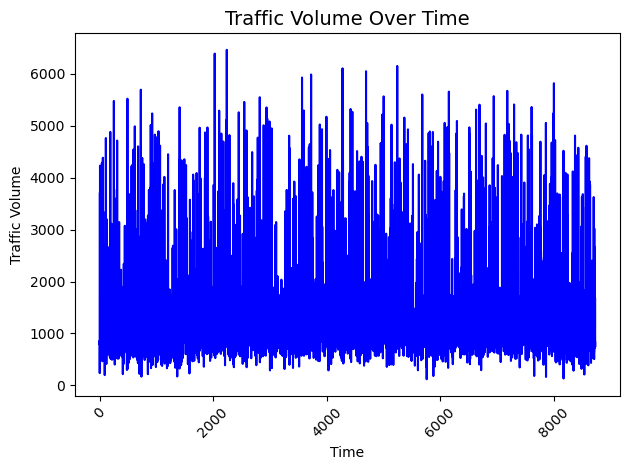

In [45]:
plt.figure()
sns.lineplot(data=a, x="Timestamp", y="Traffic Volume", color="blue")
plt.title("Traffic Volume Over Time", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Traffic Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

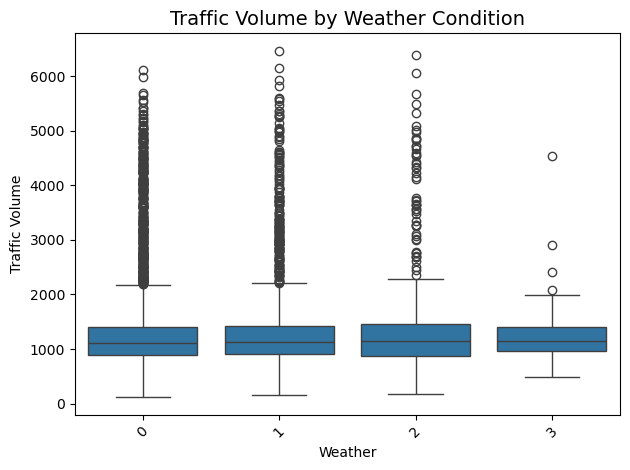

In [51]:
plt.figure()
sns.boxplot(data=a, x="Weather", y="Traffic Volume")
plt.title("Traffic Volume by Weather Condition", fontsize=14)
plt.xlabel("Weather")
plt.ylabel("Traffic Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

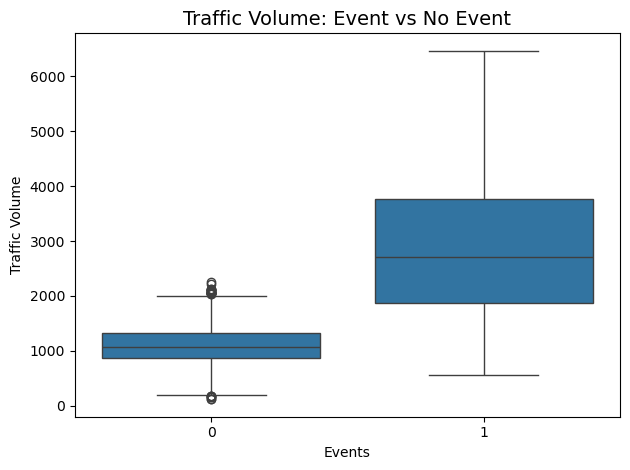

In [52]:
plt.figure()
sns.boxplot(data=a, x="Events", y="Traffic Volume")
plt.title("Traffic Volume: Event vs No Event", fontsize=14)
plt.xlabel("Events")
plt.ylabel("Traffic Volume")
plt.tight_layout()
plt.show()